In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries
%matplotlib inline
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from shapely.geometry import Point, LineString, Polygon
from functools import partial
import pyproj
from shapely.ops import transform
import numpy as np

C:\Users\gabri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dist_municip = gpd.read_file("../../data/Cidade de São Paulo/Distrito Municipal de SP/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp")

In [3]:
bairros_sp = dist_municip

In [4]:
bairros_sp["name"] = bairros_sp["Nome"]
bairros_sp['ID'] = np.arange(len(bairros_sp))
bairros_sp.set_index('ID', inplace=True)
bairros_sp["poly_type"] = "periphery"
bairros_sp = bairros_sp[["name", "poly_type", "geometry"]]
bairros_sp = bairros_sp.to_crs({'init': 'epsg:4326'})
bairros_sp

C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,name,poly_type,geometry
ID,,,
0,MANDAQUI,periphery,"POLYGON ((-46.65470 -23.43063, -46.65468 -23.4..."
1,MARSILAC,periphery,"POLYGON ((-46.60987 -23.90550, -46.60990 -23.9..."
2,MOEMA,periphery,"POLYGON ((-46.65361 -23.57219, -46.65359 -23.5..."
3,PARQUE DO CARMO,periphery,"POLYGON ((-46.44461 -23.59272, -46.44470 -23.5..."
4,PERDIZES,periphery,"POLYGON ((-46.66355 -23.53692, -46.66362 -23.5..."
...,...,...,...
91,JAGUARE,periphery,"POLYGON ((-46.73448 -23.54588, -46.73159 -23.5..."
92,JARAGUA,periphery,"POLYGON ((-46.77026 -23.45337, -46.77025 -23.4..."
93,JARDIM HELENA,periphery,"POLYGON ((-46.44027 -23.47986, -46.43999 -23.4..."


In [5]:
import os
dir = '../../data/Cidade de São Paulo'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [6]:
bairros_sp.to_file(dir + '/bairros_sp.geojson')

In [7]:
%run "../../../Automating the Project/02.Getting Buffer/Getting_Buffer3.ipynb"

In [8]:
allianz_parque = get_core(-23.52714110113603, -46.67922341431162, "Allianz Parque")

C:\Users\gabri\AppData\Local\Temp\ipykernel_1896\1456649354.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_building = building.buffer(distance=0.01)
C:\Users\gabri\AppData\Local\Temp\ipykernel_1896\1456649354.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometria = building['geometry'].buffer(distance)
C:\Users\gabri\AppData\Local\Temp\ipykernel_1896\1914737844.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  allianz_parque = get_core(-23.52714110113603, -46.67922341431162, "Allianz Parque")
C:\Users\gabri\AppData\Local\Temp\ipykernel_1896\1914737844.py:1: FutureWarning: The `op` parameter is deprecat

<AxesSubplot: >

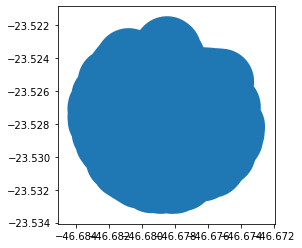

In [9]:
allianz_area = allianz_parque
allianz_area.plot()

In [121]:
allianz_region = ameba_region(allianz_area, bairros_sp)

C:\Users\gabri\AppData\Local\Temp\ipykernel_3992\4219044910.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: None

  inter = gpd.overlay(region, ameba, how='intersection')
C:\Users\gabri\anaconda3\lib\site-packages\geopandas\array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


<AxesSubplot: >

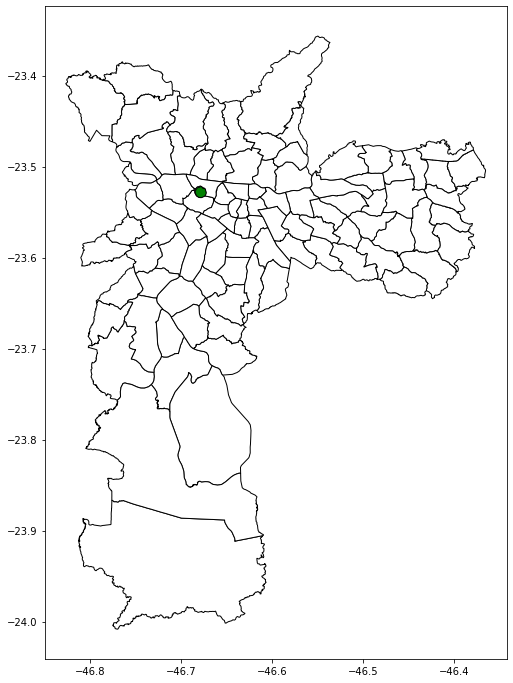

In [122]:
ax = allianz_region.plot(color="white", edgecolor="black", figsize=(15,12))
allianz_area.plot(ax=ax, color="green", edgecolor="black", figsize=(15,12))

In [123]:
import os
dir = '../../data/Cidade de São Paulo/Allianz_Parque/'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [124]:
allianz_region.to_file(dir + 'allianz_region.geojson')

### Região Metropolitana

In [10]:
metrop_reg = gpd.read_file("../../data/Estado de São Paulo/SP_Municipios_2021/SP_Municipios_2021.shp")

In [11]:
metrop_reg[metrop_reg["NM_MUN"] == "São Paulo"]

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


In [12]:
metrop_reg = metrop_reg[["NM_MUN", "geometry"]]
metrop_reg['ID'] = np.arange(len(metrop_reg))
metrop_reg.set_index('ID', inplace=True)
metrop_reg["poly_type"] = "periphery"
metrop_reg = metrop_reg.to_crs({'init': 'epsg:4326'})
metrop_reg["name"] = metrop_reg["NM_MUN"]
metrop_reg = metrop_reg[["name", "poly_type", "geometry"]]

C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
metrop_reg

,name,poly_type,geometry
ID,,,
0,Adamantina,periphery,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,Adolfo,periphery,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,Aguaí,periphery,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,Águas da Prata,periphery,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,Águas de Lindóia,periphery,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."
...,...,...,...
640,Votorantim,periphery,"POLYGON ((-47.37440 -23.52042, -47.37444 -23.5..."
641,Votuporanga,periphery,"POLYGON ((-50.02121 -20.33394, -50.02084 -20.3..."
642,Zacarias,periphery,"POLYGON ((-49.99275 -21.03884, -49.99214 -21.0..."


In [14]:
metrop_reg = metrop_reg.drop(index=[562])

<AxesSubplot: >

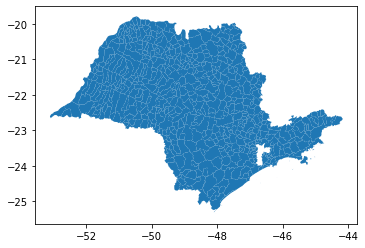

In [15]:
metrop_reg.plot()

In [16]:
city_list = ["Arujá",
        "Barueri", 
        "Biritiba-Mirim", 
        "Caieiras", 
        "Cajamar", 
        "Carapicuíba", 
        "Cotia, Diadema", 
        "Embu", 
        "Embu-Guaçu", 
        "Ferraz de Vasconcelos", 
        "Francisco Morato", 
        "Franco da Rocha", 
        "Guarulhos", 
        "Itapecerica da Serra", 
        "Itapevi", 
        "Itaquaquecetuba", 
        "Jandira", 
        "Mairiporã", 
        "Mauá, Mogi das Cruzes",
        "Osasco", 
        "Pirapora do Bom Jesus", 
        "Poá", 
        "Ribeirão Pires", 
        "Rio Grande da Serra", 
        "Salesópolis", 
        "Santa Isabel", 
        "Santana do Parnaíba", 
        "Santo André", 
        "São Bernardo do Campo", 
        "São Caetano do Sul", 
        "São Lourenço da Serra", 
        "Suzano", 
        "Taboão da Serra", 
        "Vargem Grande Paulista",
        "Piracicaba",
        "Águas de São Pedro", 
        "Analândia", 
        "Araras", 
        "Capivari", 
        "Charqueada", 
        "Conchal", 
        "Cordeirópolis", 
        "Corumbataí", 
        "Elias Fausto", 
        "Ipeúna", 
        "Iracemápolis", 
        "Leme", 
        "Limeira", 
        "Mombuca", 
        "Piracicaba", 
        "Pirassununga", 
        "Rafard", 
        "Rio Claro", 
        "Rio das Pedras", 
        "Saltinho", 
        "Santa Cruz da Conceição", 
        "Santa Gertrudes", 
        "Santa Maria da Serra",
        "São Pedro",
        "Jundiaí",
        "Cabreúva", 
        "Campo Limpo Paulista", 
        "Itupeva", 
        "Jarinu", 
        "Louveira", 
        "Várzea Paulista"
        "Campinas", 
        "Americana", 
        "Artur Nogueira", 
        "Cosmópolis", 
        "Engenheiro Coelho", 
        "Holambra", 
        "Hortolândia", 
        "Indaiatuba", 
        "Itatiba", 
        "Jaguariúna", 
        "Monte Mor", 
        "Nova Odessa", 
        "Paulínia", 
        "Pedreira", 
        "Santa Bárbara D'Oeste", 
        "Santo Antônio de Posse", 
        "Sumaré", 
        "Valinhos", 
        "Vinhedo", 
        "Morungaba",
        "São José dos Campos",
        "Ribeirão Preto",
        "Sorocaba",
        "Mauá",
        "São José do Rio Preto",
        "Mogi das Cruzes",
        "Santos",
        "Franca",
        "Bauru",
        "Juquitiba", 
        "São Lourenço da Serra",
        "Embu-Guaçu",
        "Itapecerica da Serra", 
        "Embu", 
        "Taboão da Serra", 
        "Vargem Grande Paulista",
        "Cotia",
        "São Vicente",
        "Santana de Parnaíba",
        "Cajamar",
        "Barueri",
        "Itapevi",
        "Carapecuíba",
        "Jandira",
        "Embu das Artes",
        "Praia Grande"
        "Guarujá",
        "Mongaguá",
        "Itanhaém",
        "Diadema",
        "Cubatão",
        "Várzea Paulista",
        "Campinas",
        "Atibaia",
        "Bragança Paulista"
       ]

In [17]:
len(city_list)

119

In [18]:
metrop_reg = metrop_reg[metrop_reg['name'].isin(city_list)]

In [19]:
metrop_reg.reset_index()

,ID,name,poly_type,geometry
0,6,Águas de São Pedro,periphery,"POLYGON ((-47.86297 -22.60147, -47.86263 -22.6..."
1,18,Americana,periphery,"POLYGON ((-47.26869 -22.67097, -47.26786 -22.6..."
2,22,Analândia,periphery,"POLYGON ((-47.67277 -22.01840, -47.67269 -22.0..."
3,37,Araras,periphery,"POLYGON ((-47.23694 -22.19487, -47.23550 -22.1..."
4,43,Artur Nogueira,periphery,"POLYGON ((-47.05411 -22.52649, -47.05334 -22.5..."
...,...,...,...,...
94,588,Taboão da Serra,periphery,"POLYGON ((-46.75730 -23.59978, -46.75723 -23.5..."
95,629,Valinhos,periphery,"POLYGON ((-46.97447 -22.90563, -46.97369 -22.9..."
96,633,Vargem Grande Paulista,periphery,"POLYGON ((-47.00436 -23.58000, -47.00415 -23.5..."
97,634,Várzea Paulista,periphery,"POLYGON ((-46.82121 -23.18179, -46.82096 -23.1..."


In [20]:
metrop_reg['ID'] = np.arange(len(metrop_reg))
metrop_reg.set_index('ID', inplace=True)
metrop_reg = metrop_reg[["name", "poly_type", "geometry"]]

C:\Users\gabri\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot: >

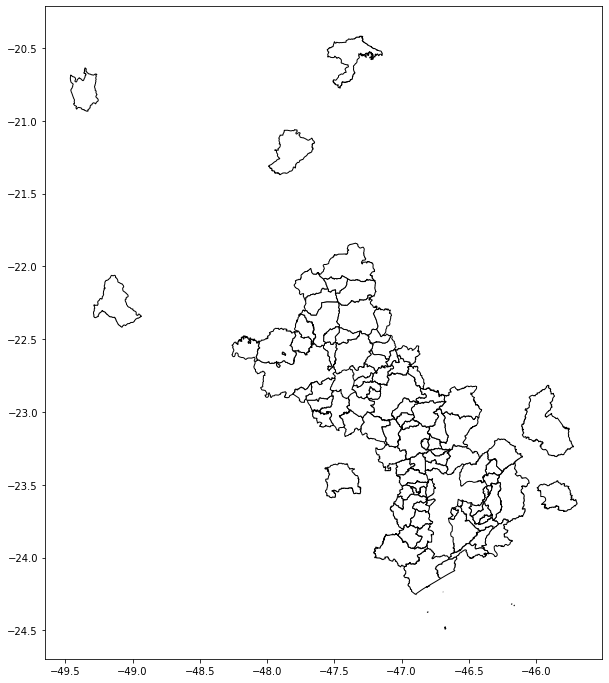

In [21]:
metrop_reg.plot(color="white", edgecolor="black", figsize=(15,12))

In [24]:
import os
dir = '../../data/Estado de São Paulo/SP_Region'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [25]:
metrop_reg.to_file(dir + '/SP_Region.geojson')

In [153]:
allianz_area = pd.concat([allianz_region, metrop_reg], ignore_index=True)

In [154]:
import os
dir = '../../data/Cidade de São Paulo/Allianz_Parque/'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [155]:
allianz_area.to_file(dir + 'allianz_area.geojson')

<AxesSubplot: >

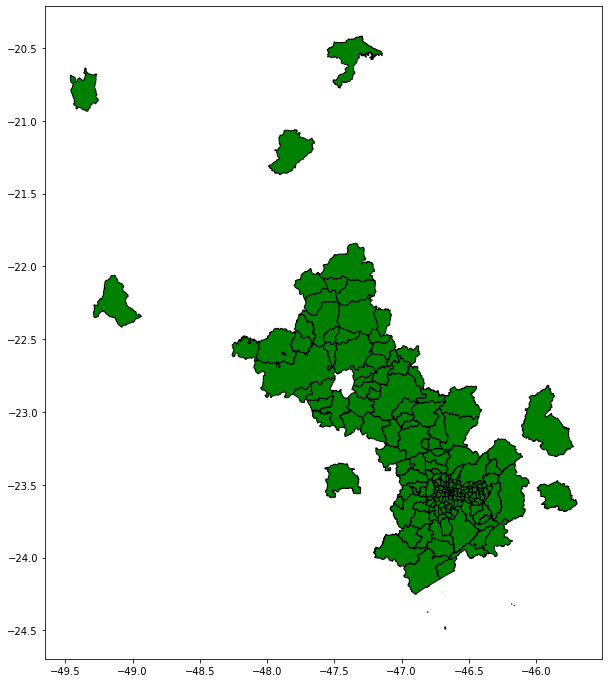

In [156]:
allianz_area.plot(color="green", edgecolor="black", figsize=(15,12))

In [157]:
allianz_area['ID'] = np.arange(len(allianz_area))
allianz_area.set_index('ID', inplace=True)

In [158]:
import os
dir = '../../data/Cidade de São Paulo/Allianz_Parque/'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [159]:
allianz_area.to_file(dir + 'allianz_area.geojson')

<AxesSubplot: >

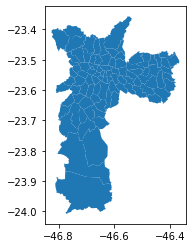

In [160]:
allianz_region.plot()